In [21]:
# 1. Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [ ]:
# 2. Chargement des données
file_path = "../cryptos_preprocessed.json"  # <-- remplace par votre vrai chemin
df = pd.read_json(file_path)
df.head()

,name,symbol,current_price,market_cap,total_volume,price_change_24h_%
0,Bitcoin,btc,82108.000000,1631065775540,4.530576e+10,1.08770
1,Ethereum,eth,1556.640000,188063081723,1.929149e+10,-0.73754
2,Tether,usdt,0.999564,144278939305,6.793027e+10,0.02501
3,XRP,xrp,2.000000,116640849587,3.362881e+09,-0.79596
4,BNB,bnb,584.030000,85211183058,6.718375e+08,1.58406


In [23]:
# 3. Création de la variable cible
df['price_up'] = (df['price_change_24h_%'] > 0).astype(int)
df[['name', 'price_change_24h_%', 'price_up']]

,name,price_change_24h_%,price_up
0,Bitcoin,1.08770,1
1,Ethereum,-0.73754,0
2,Tether,0.02501,1
3,XRP,-0.79596,0
4,BNB,1.58406,1
...,...,...,...
495,Yield Guild Games,2.23587,1
496,Solv Protocol SolvBTC Jupiter,-1.34201,0
497,Decentralized Social,-4.69414,0
498,Neiro,1.62130,1


In [24]:
# 4. Sélection des features
features = ['market_cap', 'total_volume', 'current_price']
X = df[features]
y = df['price_up']

In [25]:
# 5. Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# 6. Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Entraînement et évaluation de plusieurs modèles

Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.67      0.98      0.80       101

    accuracy                           0.66       150
   macro avg       0.33      0.49      0.40       150
weighted avg       0.45      0.66      0.54       150



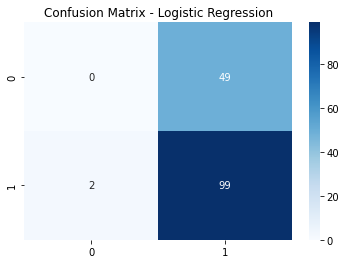

In [27]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(classification_report(y_test, y_pred_logreg))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Random Forest
              precision    recall  f1-score   support

           0       0.52      0.55      0.53        49
           1       0.78      0.75      0.76       101

    accuracy                           0.69       150
   macro avg       0.65      0.65      0.65       150
weighted avg       0.69      0.69      0.69       150



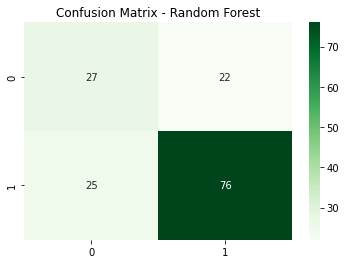

In [28]:
# Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Gradient Boosting
              precision    recall  f1-score   support

           0       0.49      0.41      0.44        49
           1       0.73      0.79      0.76       101

    accuracy                           0.67       150
   macro avg       0.61      0.60      0.60       150
weighted avg       0.65      0.67      0.66       150



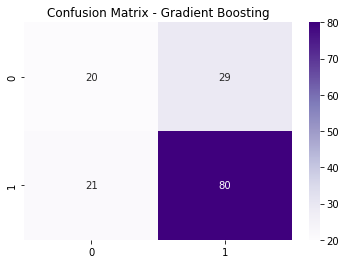

In [29]:
# Gradient Boosting

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

Résumé des performances

In [30]:
models = {
    "Logistic Regression": (y_test, y_pred_logreg),
    "Random Forest": (y_test, y_pred_rf),
    "Gradient Boosting": (y_test, y_pred_gb)
}

summary = []
for name, (yt, yp) in models.items():
    acc = accuracy_score(yt, yp)
    prec = precision_score(yt, yp, zero_division=0)
    rec = recall_score(yt, yp, zero_division=0)
    summary.append([name, acc, prec, rec])

df_summary = pd.DataFrame(summary, columns=["Model", "Accuracy", "Precision", "Recall"])
df_summary

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.660000,0.668919,0.980198
1,Random Forest,0.686667,0.775510,0.752475
2,Gradient Boosting,0.666667,0.733945,0.792079


Visualisation des données après séparation en classes

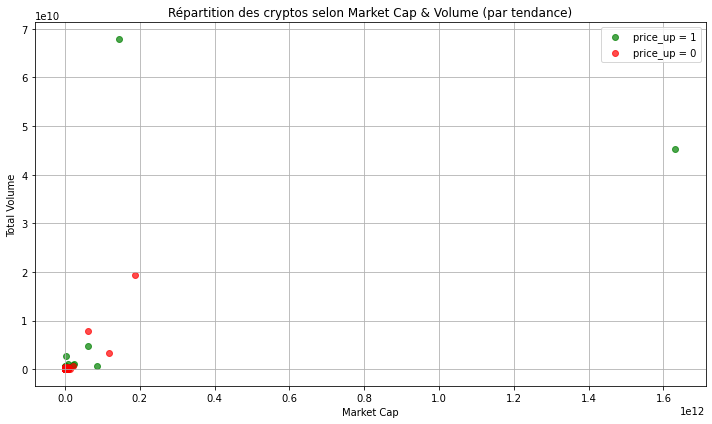

In [31]:
# Color map pour les deux classes
colors = {0: 'red', 1: 'green'}

plt.figure(figsize=(10, 6))
for label in df['price_up'].unique():
    subset = df[df['price_up'] == label]
    plt.scatter(subset['market_cap'], subset['total_volume'],
                c=colors[label], label=f"price_up = {label}", alpha=0.7)

plt.xlabel('Market Cap')
plt.ylabel('Total Volume')
plt.title('Répartition des cryptos selon Market Cap & Volume (par tendance)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

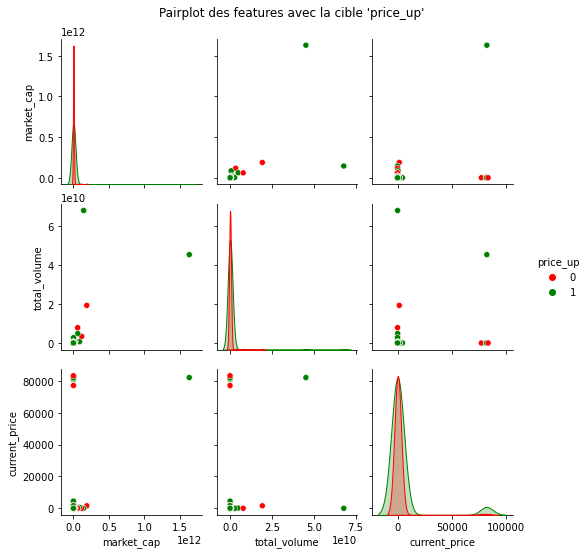

In [32]:
import seaborn as sns

sns.pairplot(df[['market_cap', 'total_volume', 'current_price', 'price_up']],
             hue='price_up', palette={0: 'red', 1: 'green'})
plt.suptitle("Pairplot des features avec la cible 'price_up'", y=1.02)
plt.show()